**Pandas**

* It is a python library that provides high-performance, easy to use data structures and data analysis tools.
* It provides fast and efficient Data Frame object for data manipulation.


**Pandas DataTypes**

* Series
* Data Frame

**Series**
* It is list of values with default integer index.
* It is single dimensional homogenously-typed array.

In [4]:
import pandas as pd
import numpy as np

In [7]:
wages = pd.Series([100,200,300,400,500])

In [8]:
type(wages)

pandas.core.series.Series

In [9]:
wages

0    100
1    200
2    300
3    400
4    500
dtype: int64

In [13]:
wages[0], wages[2:4],wages[::2]

(100,
 2    300
 3    400
 dtype: int64,
 0    100
 2    300
 4    500
 dtype: int64)

In [22]:
s = pd.Series([10,20,30,40,50,60], index = ['mon','tue','wed','thu','fri','sat'])  #custom index


In [16]:
s

mon    10
tue    20
wed    30
thu    40
fri    50
sat    60
dtype: int64

In [21]:
s['mon']

(10,
 60,
 wed    30
 thu    40
 dtype: int64)

In [23]:
s[0]  #position

10

In [25]:
marks = pd.Series([45,56,57,87,98], index = np.arange(101,106))

In [26]:
marks

101    45
102    56
103    57
104    87
105    98
dtype: int64

In [32]:
#marks[0]  # throw error it will be confusing both marks and index are numbers

In [34]:
nums = pd.Series(np.random.randint(1,100,10), index = np.arange(11,21))

In [35]:
nums

11    90
12    80
13    54
14    86
15    48
16    21
17    51
18    67
19    60
20    20
dtype: int32

**Properties of Series**

In [43]:
nums.is_unique


True

In [44]:
nums.index

Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')

In [45]:
nums.size

10

In [125]:
nums.values

array([90, 80, 54, 86, 48, 21, 51, 67, 60, 20])

In [47]:
nums.axes

[Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')]

**loc and iloc**

* iloc: selection by position 
* loc: Returns values based on the given label.    

In [60]:
nums[11], nums.loc[11] 

(90, 90)

In [58]:
nums.iloc[5], nums.iloc[0] ,nums.iloc[0:4]

(21,
 90,
 11    90
 12    80
 13    54
 14    86
 dtype: int32)

**Fancy indexing**

In [62]:
nums[nums>50]   #boolean indexing

11    90
12    80
13    54
14    86
17    51
18    67
19    60
dtype: int32

In [63]:
nums>50         # boolean indexing

11     True
12     True
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20    False
dtype: bool

In [74]:
nums.loc[[11,14,19]]    # index by array

11    90
14    86
19    60
dtype: int32

In [73]:
nums.iloc[[0,2,4]]

11    90
13    54
15    48
dtype: int32

**Methods of Series**

In [76]:
nums.describe()

count    10.000000
mean     57.700000
std      24.390572
min      20.000000
25%      48.750000
50%      57.000000
75%      76.750000
max      90.000000
dtype: float64

In [144]:
nums.aggregate(['mean','count','max'])

mean     57.7
count    10.0
max      90.0
dtype: float64

In [158]:
summary = nums.describe()

In [159]:
summary['mean']

57.7

<AxesSubplot:>

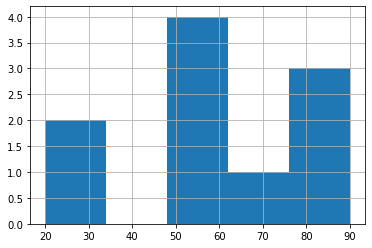

In [160]:
nums.hist(bins = 5)

**Iteration**

In [163]:
for i , n in nums.items():
    print(i,n)

11 90
12 80
13 54
14 86
15 48
16 21
17 51
18 67
19 60
20 20


In [164]:
for n in nums:
    print(n)

90
80
54
86
48
21
51
67
60
20


**Ranking**

In [165]:
marks = pd.Series(np.random.randint(1,100,10))

In [167]:
marks.rank()

0     5.0
1     2.5
2     6.0
3     4.0
4     1.0
5    10.0
6     7.0
7     8.0
8     2.5
9     9.0
dtype: float64

In [168]:
marks.rank(method = 'dense')

0    4.0
1    2.0
2    5.0
3    3.0
4    1.0
5    9.0
6    6.0
7    7.0
8    2.0
9    8.0
dtype: float64

In [170]:
marks.rank(method = 'min', ascending = False)

0     6.0
1     8.0
2     5.0
3     7.0
4    10.0
5     1.0
6     4.0
7     3.0
8     8.0
9     2.0
dtype: float64

**Selecting rows**

In [172]:
marks.head()   # first 5 rows only

0    27
1    21
2    56
3    24
4    11
dtype: int32

In [179]:
n = pd.Series([10,20,30,15,30])

In [180]:
n

0    10
1    20
2    30
3    15
4    30
dtype: int64

In [181]:
n.pct_change() * 100

0      NaN
1    100.0
2     50.0
3    -50.0
4    100.0
dtype: float64

In [183]:
marks.sort_values(ascending = False)

5    73
9    72
7    62
6    61
2    56
0    27
3    24
8    21
1    21
4    11
dtype: int32

In [184]:
sales = pd.Series( [100,120,150,100,80,200], index = [1,2,3,4,5,6])

In [283]:
# Display months where value is less than previous month 
s = sales.pct_change() * 100
s , s.iloc[3:5], s.loc[3:4]

(0           NaN
 1     20.000000
 2     25.000000
 3    -33.333333
 4    -20.000000
 5    150.000000
 dtype: float64,
 3   -33.333333
 4   -20.000000
 dtype: float64,
 3   -33.333333
 4   -20.000000
 dtype: float64)

In [252]:
def get_val(n):
        if n > 70:
            return 'A'
        elif n > 50:
            return 'B'
        else:
            return 'C'
        

In [253]:
marks.apply(get_val)

0    C
1    C
2    B
3    C
4    C
5    A
6    B
7    B
8    C
9    A
dtype: object

In [259]:
res = marks.apply(lambda r: 'Passed' if r > 50 else 'Failed')

In [265]:
res[[2,5,6]]

2    Passed
5    Passed
6    Passed
dtype: object

In [262]:
marks.apply(lambda e : e % 2==0)

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
8    False
9     True
dtype: bool

In [266]:
marks

0    27
1    21
2    56
3    24
4    11
5    73
6    61
7    62
8    21
9    72
dtype: int32

In [267]:
marks[marks > 50]

2    56
5    73
6    61
7    62
9    72
dtype: int32

In [276]:
res[res == 'Passed']

2    Passed
5    Passed
6    Passed
7    Passed
9    Passed
dtype: object

In [277]:
marks[marks % 2 == 0]

2    56
3    24
7    62
9    72
dtype: int32